In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [5]:
model2 = Sequential([
    Flatten(input_shape = (8,8)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='sigmoid')
])

In [6]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
Total params: 1,720
Trainable params: 1,720
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [8]:
# Build the Sequential convolutional neural network model

model3 = Sequential([
    Conv2D(16, (3,3), padding='SAME', strides = 2, activation='relu', input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [9]:
# Print the model summary

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Build the Sequential convolutional neural network model

# adding data_format to avoid input data format errors
model4 = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape = (28, 28, 1), data_format='channels_last'),
    MaxPooling2D((3,3), data_format='channels_last'),
    Flatten(),
    Dense(10, activation='softmax')
])

In [66]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [12]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy', 'mae'])

In [67]:
# Define the model optimizer, loss function and metrics
op = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model4.compile(optimizer=op,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [69]:
# Print the resulting model attributes

print(model4.optimizer)
print(model4.optimizer.lr)
print(model4.loss)
print(model4.metrics)


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f6414049588>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f6414049780>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [19]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [20]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [35]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [36]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [38]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

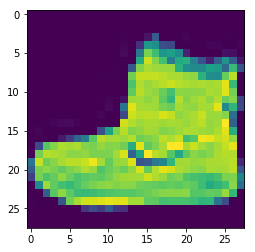

label: Ankle boot


In [40]:
# Display one of the images

img = train_images[0, :, :]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[0]]}')

#### Fit the model

In [71]:
# Fit the model

history = model4.fit(train_images[...,np.newaxis], train_labels, epochs = 8, batch_size = 256)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 49s 813us/sample - loss: 0.8399 - sparse_categorical_accuracy: 0.7148 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 48s 802us/sample - loss: 0.7558 - sparse_categorical_accuracy: 0.7350 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 48s 793us/sample - loss: 0.7093 - sparse_categorical_accuracy: 0.7462 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 [==============================] - 47s 782us/sample - loss: 0.6794 - sparse_categorical_accuracy: 0.7546 - mean_absolute_error: 4.4200s - loss: 0.6830 - sparse_
Epoch 5/8
60000/60000 [==============================] - 47s 782us/sample - loss: 0.6566 - sparse_categorical_accuracy: 0.7606 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 [==============================] - 47s 785us/sample - loss: 0.6392 - sparse_categorical_accuracy: 0.7656 - mean_absolute_error: 4.4200
Epoch 7/8

#### Plot training history

In [72]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.839861,0.714817,4.420001
1,0.755822,0.735033,4.420001
2,0.709276,0.746217,4.420000
3,0.679383,0.754633,4.419999
4,0.656638,0.760550,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

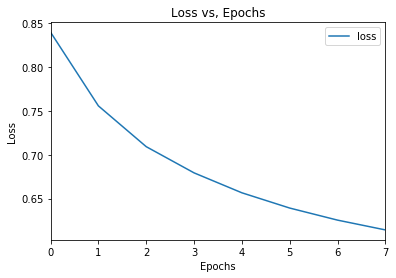

In [74]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title = 'Loss vs, Epochs')
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

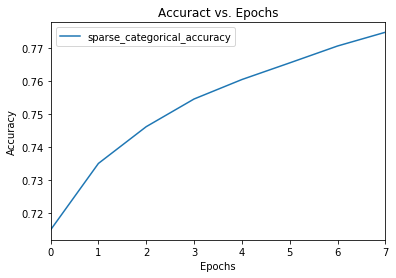

In [75]:
# Make a plot for the accuracy

acc_plot = df.plot(y="sparse_categorical_accuracy", title = "Accuract vs. Epochs")
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0, 0.5, 'Mean absolute error'), Text(0.5, 0, 'Epochs')]

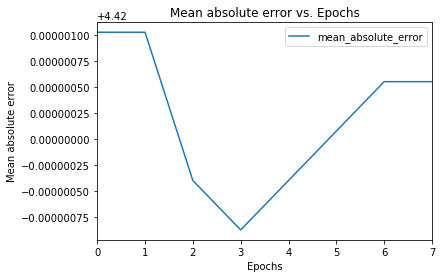

In [76]:
# Make a plot for the additional metric

metric_plot = df.plot(y="mean_absolute_error", title = "Mean absolute error vs. Epochs")
metric_plot.set(xlabel='Epochs', ylabel='Mean absolute error')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [84]:
# Evaluate the model

loss, accuracy, mae = model4.evaluate(test_images[...,np.newaxis], test_labels, verbose = 2)

10000/1 - 5s - loss: 0.4521 - sparse_categorical_accuracy: 0.7659 - mean_absolute_error: 4.4200


In [85]:
print(f'Loss of test set is {loss}, accuracy is {accuracy} and mean absolute error is {mae}')

Loss of test set is 0.6340159409046173, accuracy is 0.7659000158309937 and mean absolute error is 4.419997215270996


#### Make predictions from the model

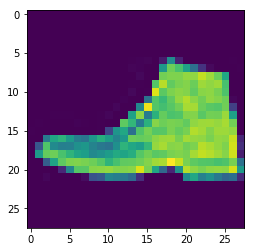

Label: Ankle boot


In [88]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [91]:
# Get the model predictions

predictions = model4.predict(test_image[np.newaxis,...,np.newaxis])
print(f'Model prediction: {labels[np.argmax(predictions)]}')

Model prediction: Ankle boot
